In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'을 사용하는 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [746]:
df = pd.read_csv('병합데이터.csv')
df = df.drop(columns = 'Unnamed: 0')

df_log = pd.read_csv('log_clean.csv')
df_ex = pd.read_csv('ex_clean.csv')
df_sv = pd.read_csv('sv_clean.csv') 
df_cus = pd.read_csv('cus_clean.csv')

df_log = df_log.drop(columns = 'Unnamed: 0')
df_ex = df_ex.drop(columns = 'Unnamed: 0')
df_sv = df_sv.drop(columns = 'Unnamed: 0')
df_cus = df_cus.drop(columns = 'Unnamed: 0')
df_sv_grouped = df_sv.groupby(['서비스번호', '서비스명', '판매자', '서비스가격', '평점', '대분류'], as_index=False)['판매수'].sum()

In [747]:
df_log['수수료율'].value_counts(normalize=True) *100

수수료율
6.5    69.998867
7.5    20.000755
9.0    10.000378
Name: proportion, dtype: float64

In [748]:
df_log.groupby('고객ID')['서비스번호'].count().sort_values().tail(10)

고객ID
10020100376     84
100201003149    84
100201003157    85
100201003168    86
100201003129    87
10020100386     88
100201003151    90
100201003128    91
100201003138    94
100201003122    96
Name: 서비스번호, dtype: int64

In [749]:
df_log.loc[(df_log['판매자']=='효베르'),'수수료율'].value_counts(normalize=True) *100


수수료율
6.5    69.225968
7.5    20.724095
9.0    10.049938
Name: proportion, dtype: float64

In [750]:
df_log.loc[(df_log['고객ID']==10020100376)]

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
3978,20210203,6.5,10020100376,0.0,0,0.0,0.0,php 프로그래밍해 드립니다.,Starcoding,40000.0,40000.0,4.4,17.0,프로그래밍,2948.0
6637,20210204,6.5,10020100376,0.0,0,0.0,0.0,SOROOM 모바일웹 전문가가 멋진 모바일웹을 구현해 드립니다.,soroom,100000.0,100000.0,5.0,10.0,홈페이지,3241.0
14716,20210208,6.5,10020100376,0.0,0,0.0,0.0,Excel을 활용한 사무 자동화 제작 및 수정,모두의자동화,15000.0,15000.0,5.0,12.0,프로그래밍,3160.0
15075,20210208,6.5,10020100376,0.0,0,0.0,0.0,모든 SQL 쿼리 개발 및 전환 을 도와 드립니다.,database전문가,8000.0,8000.0,5.0,61.0,프로그래밍,2379.0
19793,20210210,6.5,10020100376,0.0,0,0.0,0.0,워드프레스 설치 및 세팅 드립니다.,카리스턱,15000.0,15000.0,5.0,19.0,홈페이지,2875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327796,20210622,9.0,10020100376,0.0,0,0.0,0.0,용도에 따른 견적 짜 드립니다.,즐PC,10000.0,10000.0,5.0,26.0,기타,2706.0
329720,20210623,6.5,10020100376,0.0,0,0.0,0.0,"웹 유지보수 및 개선, 수정, 기능추가를 해 드립니다.",GanziMan,5000.0,5000.0,5.0,8.0,홈페이지,3410.0
330132,20210623,7.5,10020100376,0.0,0,0.0,0.0,카페24 쇼핑몰 기능제작 및 간단한 수정해 드립니다.,PIXEL,5000.0,5000.0,5.0,31.0,커머스,2626.0
333733,20210626,7.5,10020100376,0.0,0,0.0,0.0,대용량 데이터 처리 VBA보다 빠름 해 드립니다.,AutomationKim,30000.0,30000.0,5.0,16.0,데이터,2983.0


In [751]:
df_log.loc[(df_log['고객ID']==5070500573)]

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
1907,20210202,9.0,5070500573,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
284854,20210601,6.5,5070500573,0.0,0,0.0,0.0,HTML/CSS/JS 소스 수정 유지보수해 드립니다.,DevelopersUFO,7000.0,7000.0,5.0,5.0,홈페이지,3670.0


In [752]:
# 일괄 10퍼
# 실적에 따라 환급
# 실적유도를 통해 사이트내 거래 유도
# 타사 (숨고, 크몽 보다는 여전히 작은수치)

In [753]:
df_log['거래일자'] = pd.to_datetime(df_log['거래일자'], format='%Y%m%d')
df_log['현행수수료'] = df_log['수수료율'] * df_log['판매금액'] /100
df_log

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,현행수수료
0,2021-02-01,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,962.0
1,2021-02-01,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,325.0
2,2021-02-01,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,1248.0
3,2021-02-01,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,4575.0
4,2021-02-01,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,3250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344272,2021-06-30,9.0,50150001196,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1800.0
344273,2021-06-30,7.5,60107010137,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1500.0
344274,2021-06-30,9.0,70406002101,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1800.0
344275,2021-06-30,6.5,9010306354,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1300.0


In [886]:
# 2021년 2월 데이터 필터링
month_2 = df_log[(df_log['거래일자'].dt.month == 4)]
month_2_ex = pd.pivot_table(month_2 ,index = '판매자',values = ['판매금액','현행수수료'],aggfunc ='sum').reset_index()
month_2_ex['수수료'] = 0.1
month_2_ex['일괄수수료'] = month_2_ex['판매금액'] * month_2_ex['수수료']


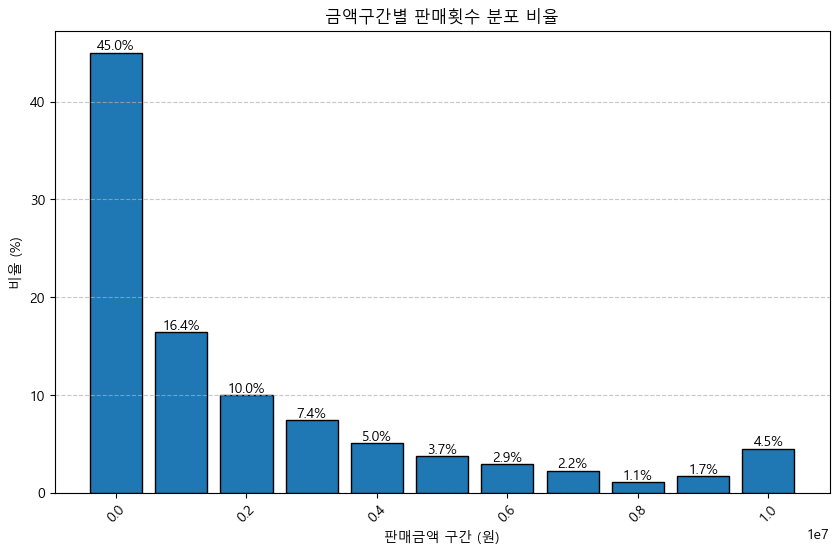

In [888]:
import matplotlib.pyplot as plt

month_2_ex['판매금액_제한'] = month_2_ex['판매금액'].apply(lambda x: min(x, 10000000))
'''
conditions = [  # 1000만 원 초과
    month_2_ex['판매금액_제한'] >= 10000000,
    month_2_ex['판매금액_제한'] > 4000000,
    month_2_ex['판매금액_제한'] > 2000000,
    month_2_ex['판매금액_제한'] > 1000000 
]
'''
#choices = [4,3, 2,1]  # 각 조건에 맞는 구간 값

# 조건이 모두 거짓일 경우(300만 원 이하) 기본값으로 0을 설정
#month_2_ex['판매금액_구간'] = np.select(conditions, choices, default=0)
month_2_ex['판매금액_구간'] = month_2_ex['판매금액_제한'] // 1000000 * 1000000
# 각 구간별로 데이터의 비율을 계산
# 구간별 데이터의 개수를 세고 전체에서 차지하는 비율을 계산
distribution = month_2_ex['판매금액_구간'].value_counts(normalize=True).sort_index()

# 구간별 차지 비율을 바 차트로 나타내기
plt.figure(figsize=(10, 6))
bars = plt.bar(distribution.index, distribution.values *100, width=800000,edgecolor='black')  # 비율을 백분율로 표시
plt.title('금액구간별 판매횟수 분포 비율')
plt.xlabel('판매금액 구간 (원)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, distribution.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.1f}%', ha='center', va='bottom')


plt.show()


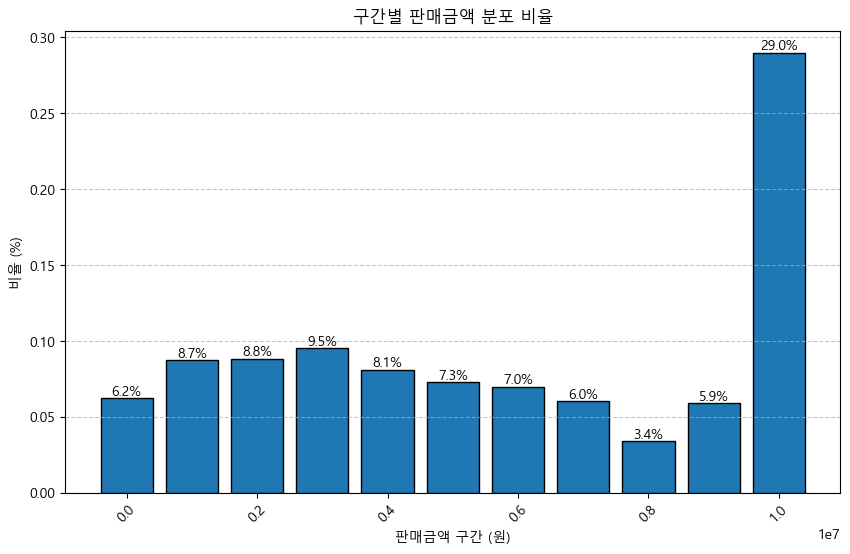

In [889]:
k = pd.pivot_table(month_2_ex,index = '판매금액_구간', values = '판매금액',aggfunc = 'sum').reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(k['판매금액_구간'],k['판매금액']/k['판매금액'].sum(),width=800000 , edgecolor='black')  # 비율을 백분율로 표시
plt.title('구간별 판매금액 분포 비율')
plt.xlabel('판매금액 구간 (원)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, k['판매금액']/k['판매금액'].sum()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.1f}%', ha='center', va='bottom')


plt.show()

In [1001]:
# 재실행 후 필요한 패키지 및 함수 재정의

# 기존 환급 계산 함수 재정의
def calculate_tiered_refund(sale_amount):
    refund_amount = 0  # 초기 환급 금액 설정

    # 구간별로 판매 금액 분할 및 환급율 적용
    
    if sale_amount > 10000000:  # 1000만 원 이상
        refund_amount += (sale_amount - 10000000) * 0.07 # 60% 환급 수수료4%
        sale_amount = 10000000  # 다음 구간으로 한정
    if sale_amount > 5000000:   # 500만 원 이상
        refund_amount += (sale_amount - 5000000) * 0.05  # 50% 환급 수수료5%
        sale_amount = 5000000  # 다음 구간으로 한정
    if sale_amount > 2000000:   # 200만 원 이상
        refund_amount += (sale_amount - 2000000) * 0.03  # 30% 환급 수수료7%
        sale_amount = 2000000  # 다음 구간으로 한정
    if sale_amount > 1000000:   # 100만 원 이상
        refund_amount += (sale_amount - 1000000) * 0.01  # 20% 환급 수수료9%
    
    return refund_amount

# 실제 수수료율이 6%가 되는 판매금액 찾기
target_fee_rate = 0.07
increment = 50000  # 판매금액 증가 단위
sale_amount = 1000000  # 초기 판매금액 설정

while True:
    total_fee = sale_amount * 0.10  # 총 수수료 (10%)
    refund = calculate_tiered_refund(sale_amount)  # 환급 금액 계산
    actual_fee_rate = (total_fee - refund) / sale_amount  # 실제 수수료율 계산

    if actual_fee_rate <= target_fee_rate:
        break
    sale_amount += increment

sale_amount, actual_fee_rate


(7500000, 0.07)

In [1003]:


# 구간 환급 금액 계산하여 새로운 열 '환급금액' 추가
month_2_ex['환급금액'] = month_2_ex['판매금액'].apply(calculate_tiered_refund)

# 최종 데이터프레임 확인
month_2_ex['최종수수료'] = month_2_ex['일괄수수료'] - month_2_ex['환급금액']
month_2_ex

,판매자,판매금액,현행수수료,수수료,일괄수수료,환급금액,최종수수료
0,100ME,8091720.0,549513.80,0.1,809172.0,254586.0,554586.0
1,10xDeveloper,469080.0,32036.00,0.1,46908.0,0.0,46908.0
2,10년차웹개발자,960960.0,67823.90,0.1,96096.0,0.0,96096.0
3,12년차기획전문가,9899300.0,679387.00,0.1,989930.0,344965.0,644965.0
4,12년차데브옵스,91200.0,5928.00,0.1,9120.0,0.0,9120.0
...,...,...,...,...,...,...,...
1339,황준홍,4489610.0,310635.25,0.1,448961.0,84688.3,364272.7
1340,황코딩,562200.0,36543.00,0.1,56220.0,0.0,56220.0
1341,회사도움꾼,6000000.0,390000.00,0.1,600000.0,150000.0,450000.0
1342,효베르,4637140.0,324739.75,0.1,463714.0,89114.2,374599.8


In [1004]:
month_2_ex['수수료증가여부'] = (month_2_ex['현행수수료'] -month_2_ex['최종수수료']) >0

In [1005]:
month_2_ex['수수료증가여부'].value_counts()

수수료증가여부
False    1227
True      117
Name: count, dtype: int64

In [1006]:
print(month_2_ex['최종수수료'].sum() / month_2_ex['현행수수료'].sum())


1.02868598384785


In [1007]:

##################################################

In [1009]:
# 2021년 2월 데이터 필터링
sum_new = 0
sum_old = 0
for i in [1,2,3,4,5,6]:
    month_2 = df_log[(df_log['거래일자'].dt.month == i)]
    month_2_ex = pd.pivot_table(month_2 ,index = '판매자',values = ['판매금액','현행수수료'],aggfunc ='sum').reset_index()
    month_2_ex['수수료'] = 0.1
    month_2_ex['일괄수수료'] = month_2_ex['판매금액'] * month_2_ex['수수료']
    
    # 구간 환급 금액 계산하여 새로운 열 '환급금액' 추가
    month_2_ex['환급금액'] = month_2_ex['판매금액'].apply(calculate_tiered_refund)
    
    # 최종 데이터프레임 확인
    month_2_ex['최종수수료'] = month_2_ex['일괄수수료'] - month_2_ex['환급금액']
    sum_new += month_2_ex['최종수수료'].sum()
    sum_old += month_2_ex['현행수수료'].sum()
    print(f'{i}월', month_2_ex['최종수수료'].sum() / month_2_ex['현행수수료'].sum())

sum_new , sum_old

1월 1.051736378869828
2월 1.1207181190000879
3월 1.0261063039566711
4월 1.043306911503632
5월 1.0535847916938597
6월 1.02868598384785


(1584453654.1000001, 1506865144.6000001)

In [1010]:
df_log['현행수수료'].sum()

1506865144.6000001

In [1011]:
sum_new / df_log['현행수수료'].sum()

1.0514900153992188